In [27]:
# Загрузка данных клиентов
data = {
	'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
	'Age': [32, 45, 29, 56, 38, 60, 50, 25, 30, 40, 55, 65, 20, 33, 39],
	'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male'],
	'TotalSpend': [1000, 1500, 500, 2000, 800, 200, 1800, 1400, 600, 900, 350, 690, 500, 1200, 1300],
	'Purchases': [5, 3, 7, 2, 4, 1, 8, 3, 6, 9, 6, 1, 4, 1, 2],
	'Stay': [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0]  # 0 - остается, 1 - ушел
}

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Преобразуем данные в DataFrame
df = pd.DataFrame(data)

#  Очистка данных: обработка пропущенных значений и дубликатов
print("Количество пропущенных значений:")
print(df.isnull().sum())
df.drop_duplicates(inplace=True)

# Преобразование данных: кодирование категориальных признаков
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Выведем окончательный результат
print("Первые 5 строк данных:")
print(df.head())

print("\nОсновные статистики о клиентах:")
print(df.describe())


Количество пропущенных значений:
CustomerID    0
Age           0
Gender        0
TotalSpend    0
Purchases     0
Stay          0
dtype: int64
Первые 5 строк данных:
   CustomerID  Age  Gender  TotalSpend  Purchases  Stay
0           1   32       1        1000          5     0
1           2   45       0        1500          3     0
2           3   29       0         500          7     0
3           4   56       1        2000          2     1
4           5   38       1         800          4     0

Основные статистики о клиентах:
       CustomerID        Age     Gender   TotalSpend  Purchases       Stay
count   15.000000  15.000000  15.000000    15.000000  15.000000  15.000000
mean     8.000000  41.133333   0.600000   982.666667   4.133333   0.333333
std      4.472136  13.563958   0.507093   537.460519   2.614975   0.487950
min      1.000000  20.000000   0.000000   200.000000   1.000000   0.000000
25%      4.500000  31.000000   0.000000   550.000000   2.000000   0.000000
50%      8.00000

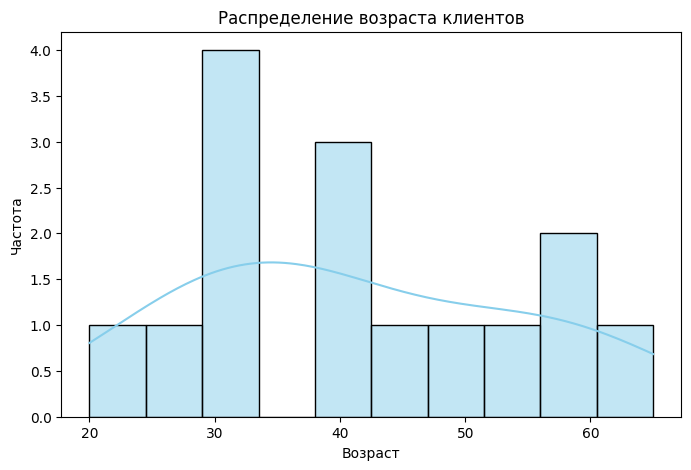

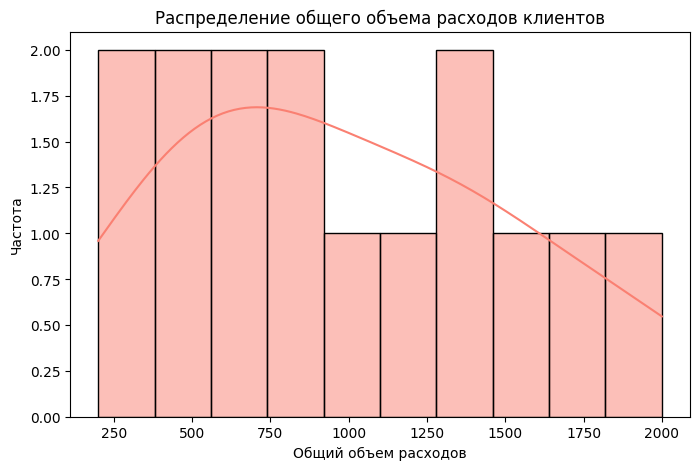

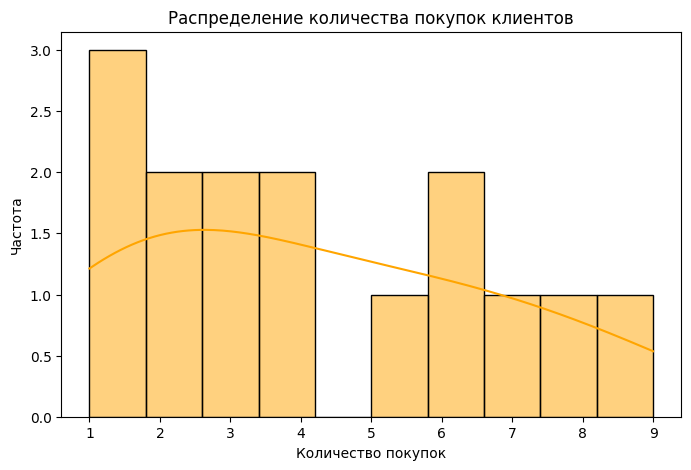

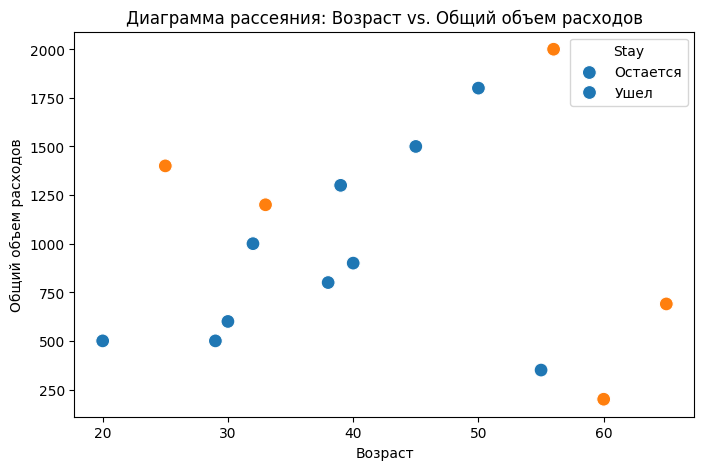

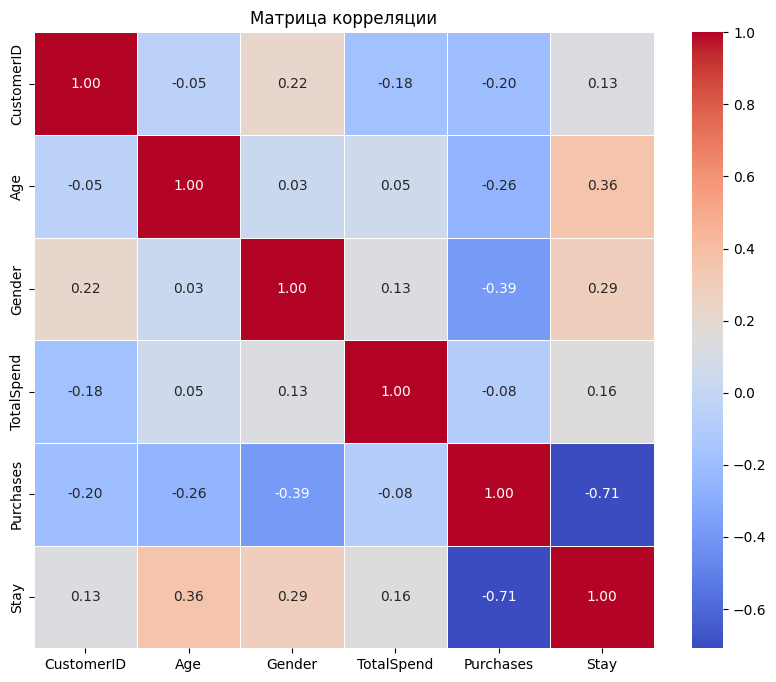

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построим гистограмму возраста клиентов
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возраста клиентов')
plt.show()

# Построим гистограмму общего объема расходов
plt.figure(figsize=(8, 5))
sns.histplot(df['TotalSpend'], bins=10, kde=True, color='salmon')
plt.xlabel('Общий объем расходов')
plt.ylabel('Частота')
plt.title('Распределение общего объема расходов клиентов')
plt.show()

# Построим гистограмму количества покупок
plt.figure(figsize=(8, 5))
sns.histplot(df['Purchases'], bins=10, kde=True, color='orange')
plt.xlabel('Количество покупок')
plt.ylabel('Частота')
plt.title('Распределение количества покупок клиентов')
plt.show()

# Построим диаграмму рассеяния для визуализации связи между признаками Age и TotalSpend
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='TotalSpend', data=df, hue='Stay', s=100)
plt.xlabel('Возраст')
plt.ylabel('Общий объем расходов')
plt.title('Диаграмма рассеяния: Возраст vs. Общий объем расходов')
plt.legend(title='Stay', labels=['Остается', 'Ушел'])
plt.show()

# Построим матрицу корреляции между признаками
correlation_matrix = df.corr()

# Визуализируем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

X = df[['Age', 'Gender', 'TotalSpend', 'Purchases']]
y = df['Stay']

# Разделяем данные на обучающую (80%) и тестовую (20%) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Настройка конвейера
cls = SVC(C=10.0,
          kernel='rbf',
          gamma=0.1,
          decision_function_shape='ovr')

kernel_svm = Pipeline([('preprocessing', StandardScaler()),
                       ('classifier', cls)])

# Настройка сеточного поиска
param_grid = [{'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
              'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'classifier': [RandomForestClassifier(n_estimators=10)],
              'preprocessing': [None], 'classifier__max_features': [1, 2, 3]},
              {'classifier': [DecisionTreeClassifier(random_state=0)],
                'preprocessing': [None], 'classifier__max_depth': [1, 2, 3]},
              {'classifier': [GradientBoostingClassifier(random_state=0)],
                'preprocessing': [None], 'classifier__max_depth': [1, 2, 3]},
              {'classifier': [MLPClassifier(random_state=0)],
                'preprocessing': [StandardScaler(), None]}
              ]

gs = GridSearchCV(estimator=kernel_svm,
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1,
                  cv=5,
                  verbose=1,
                  refit=True,
                  pre_dispatch='2*n_jobs')

# Запуск
gs.fit(X_train, y_train)
print('Best GS Score %.2f' % gs.best_score_)
print('best GS Params %s' % gs.best_params_)
print('best score test %s' % gs.score(X_test,y_test))

# Предсказание на тренировочном наборе
y_pred = gs.predict(X_train)
train_acc = (y_train == y_pred).sum()/len(y_train)
print('\nTrain Accuracy: %.2f' % (train_acc))

# Оценка на тестовом наборе
y_pred = gs.predict(X_test)
test_acc = (y_test == y_pred).sum()/len(y_test)
print('\nTest Accuracy: %.2f' % (test_acc))

Fitting 5 folds for each of 83 candidates, totalling 415 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best GS Score 0.77
best GS Params {'classifier': MLPClassifier(random_state=0), 'preprocessing': None}
best score test 0.6666666666666666

Train Accuracy: 0.75

Test Accuracy: 0.67
